# Speckle Noise Experiments

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from utils.images_generator import speckle_noise_gs, normalize_img_to_0_255, generate_histogram,add_speckle_noise


In [2]:

img_name = "noise_original"
# Load an image
image = Image.open(f'data/misc/{img_name}.png')

# Add speckle noise with default parameters
noised_image = add_speckle_noise(image)

intensity = 0.9
# Add speckle noise with custom parameters
custom_noised = add_speckle_noise(image, 
                                 intensity=intensity,    # Stronger noise effect
                                 mean=0.2,         # Slight positive bias
                                 sigma=0.3)        # More variation in noise

# Create a demonstration of all noise types
noised = custom_noised.convert('L')
# noised.save(f'data/misc/{img_name}_speckle_int{intensity}.png')

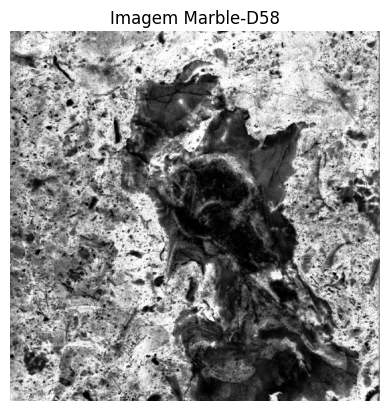

In [3]:
images_class = 'Marble'
images_path = f'data/Normalized_Brodatz/{images_class}'
image_name = 'D58'
image_title = f'{images_class}-{image_name}'
gs_image = cv2.imread(f'{images_path}/{image_name}.tif', cv2.IMREAD_GRAYSCALE)
if gs_image is not None:
    plt.imshow(gs_image, cmap='gray')
    plt.title(f"Imagem {image_title}")
    plt.axis('off')  # Remove os eixos
    plt.show()
else:
    print('error')

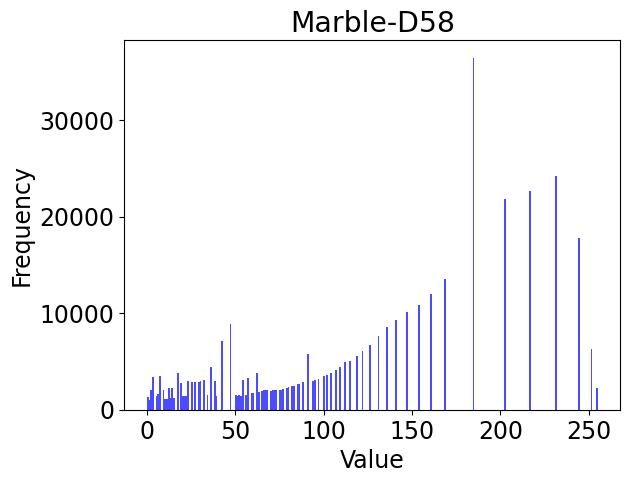

In [14]:
plt.clf()
generate_histogram(gs_image, isNormalized=True, title=f'{image_title}')

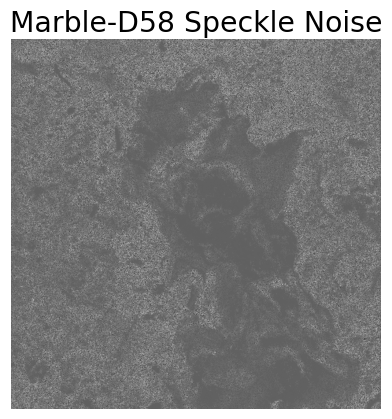

In [15]:
speckle_image = speckle_noise_gs(gs_image)

# Plot the results
plt.clf()
plt.figure(1,figsize=(12, 8))
plt.imshow(speckle_image, cmap='gray')
plt.title(f'{image_title} Speckle Noise')
plt.axis('off')  # Remove os eixos
plt.savefig(f'results/speckle_noise/{image_title}.png', bbox_inches='tight')

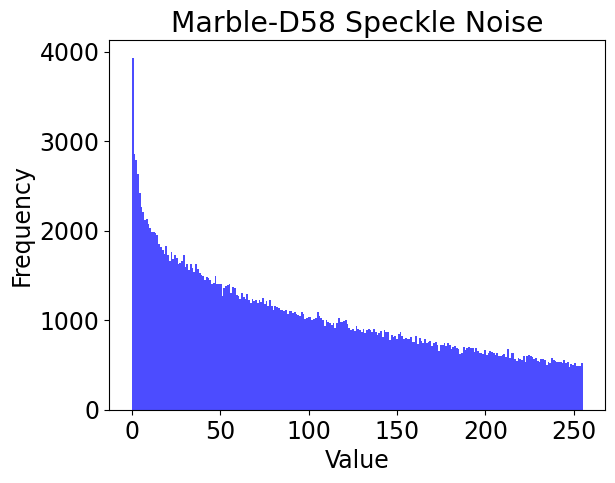

In [16]:
plt.clf()
generate_histogram(speckle_image, isNormalized=True, title=f'{image_title} Speckle Noise')
plt.savefig(f'results/speckle_noise/{image_title}_histogram.png', bbox_inches='tight')

## Generating data for the images

In [17]:
from utils.experiments_functions import get_img_info

In [18]:
image_title = 'Marble-D58'
image_3_3_4_data = get_img_info(speckle_image, q_linspace = np.linspace(-2, 20, num = 221))
image_3_3_4_data.head(5)
image_3_3_4_data.to_csv(f"results/speckle_noise/{image_title}.csv", index = False)

q = -2.0
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:624: RuntimeWarning: divide by zero encountered in power
  weights                   = np.power(partitions.var(axis=1), q/2)
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:630: RuntimeWarning: invalid value encountered in divide
  probabilities = total_variance_per_symbol/total_variance_per_symbol.sum()


dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)


C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: divide by zero encountered in log
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2
C:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\ordpy\ordpy\ordpy.py:739: RuntimeWarning: invalid value encountered in multiply
  s_of_p_over_2 = -np.sum(probabilities*np.log(probabilities))/2


Result: Entropy = -0.0; Complexity Measure = nan;
q = -1.9
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = -0.0; Complexity Measure = nan;
q = -1.8
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = -0.0; Complexity Measure = nan;
q = -1.7
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = -0.0; Complexity Measure = nan;
q = -1.6
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = -0.0; Complexity Measure = nan;
q = -1.5
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx 

## Generating both planes

In [22]:
image_title = 'Marble-D58'
data_ss = pd.read_csv(f"results/speckle_noise/{image_title}.csv")

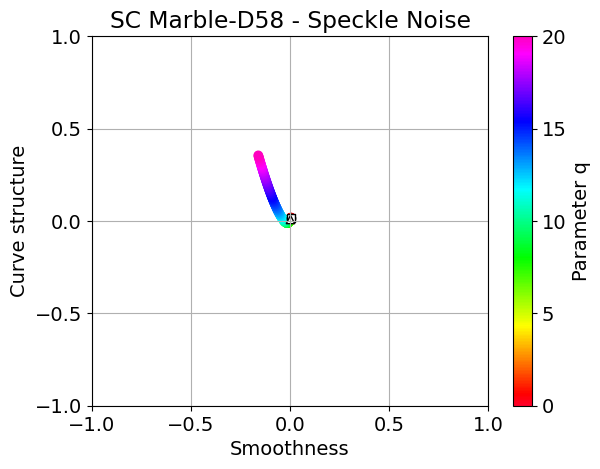

<Figure size 640x480 with 0 Axes>

In [23]:
# SMOOTHNESS
plt.figure(1)
plt.clf() # clears the figure
plt.rcParams.update({"font.size": 14})
scatter = plt.scatter(data_ss["Smoothness"], data_ss["Curve structure"], c=data_ss['q'], cmap='gist_rainbow')
# Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
special_symbols = {0: 'o', 1: 's', 2: '^'}
for q_value, marker in special_symbols.items():
    subset = data_ss[data_ss['q'] == q_value]
    plt.scatter(subset["Smoothness"], subset["Curve structure"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')

plt.colorbar(scatter, label='Parameter q')
# plt.ylim([0, 1])
# plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.grid()
plt.xlabel('Smoothness')
plt.ylabel('Curve structure')
plt.title(f'SC {image_title} - Speckle Noise')

plt.savefig(f'results/speckle_noise/planes/{image_title}_SCplane_weighted.png', bbox_inches='tight')
        
# CECP
plt.figure(2)
plt.clf() # clears the figure
plt.rcParams.update({"font.size": 17})
scatter = plt.scatter(data_ss['Weighted Entropy Correct'], data_ss['Weighted Complexity Correct'], c=data_ss['q'], cmap='gist_rainbow')
# Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
special_symbols = {0: 'o', 1: 's', 2: '^'}
for q_value, marker in special_symbols.items():
    subset = data_ss[data_ss['q'] == q_value]
    plt.scatter(subset["Weighted Entropy Correct"], subset["Weighted Complexity Correct"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')
plt.colorbar(scatter, label='Parameter q')
# plt.ylim([0, 1])
# plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.grid()
plt.xlabel('Weighted Entropy')
plt.ylabel('Weighted Complexity')
plt.title(f'CECP {image_title} - Speckle Noise')

plt.savefig(f'results/speckle_noise/planes/{image_title}_CECPplane_weighted.png', bbox_inches='tight')
plt.clf() # clears the figure

## Plotting the probabilities